# **Group Name**: **Student Performance Prediction and Grade Classification**  
# **File Name**: **Regression** 
---
## **Group Members**:  
1. **Asad Ali** - **2020-ag-8598**  
2. **Faizan Khawar** - **2020-ag-8612**  
3. **Muhammad Salman** - **2020-ag-8629**   

### **Instructor**: Sir Shoaib Farooq  
### **Course Title**: Machine Learning  
### **Section**: BSCS 5th (Morning)  
### **Date**: December 22, 2024  
---

In [161]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.decomposition import PCA


## Read and Load Dataset

In [162]:
df= pd.read_csv('student_dataset.csv')

In [163]:
df

,attribute_0,avg_marks,min_marks,max_marks,surrounding_environment,level_of_comfortable_zone_for_student,university_contribution_in_paper_setting,stud_contribution_in_fighting_for_exam,stud_teacher_contribution_in_learning,gender,...,inappropriate_yllabus,family_responsiblities,festival_holidays,financial_status,incentive_programs,exam_stress,overall_pg_performance,pg_sem_4_10_classes,pg_class_coded,pg_class_coded_cat
0,0.0,68.166667,42.500000,54.500000,3.0,9.0,5.0,4.0,5.0,1.0,...,2.0,2.0,1.0,2.0,1.0,1.0,1.0,6.0,6.0,2
1,1.0,68.214286,42.535714,54.535714,3.0,9.0,5.0,4.0,5.0,1.0,...,2.0,2.0,1.0,2.0,1.0,1.0,1.0,6.0,6.0,2
2,2.0,74.966667,47.600000,59.600000,3.0,9.0,5.0,4.0,5.0,1.0,...,2.0,2.0,1.0,2.0,1.0,1.0,1.0,7.0,7.0,3
3,3.0,75.500000,48.000000,60.000000,3.0,9.0,5.0,4.0,5.0,1.0,...,2.0,2.0,1.0,2.0,1.0,1.0,1.0,7.0,7.0,3
4,4.0,76.166667,48.500000,60.500000,3.0,9.0,5.0,4.0,5.0,1.0,...,2.0,2.0,1.0,2.0,1.0,1.0,1.0,7.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,3887.0,106.666667,80.750000,81.750000,6.0,6.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,6.0,6.0,2
3888,3888.0,103.333333,75.750000,78.750000,6.0,6.0,2.0,2.0,2.0,2.0,...,3.0,1.0,1.0,3.0,1.0,1.0,1.0,6.0,6.0,2
3889,3889.0,105.000000,75.750000,83.750000,6.0,6.0,2.0,2.0,2.0,2.0,...,3.0,1.0,1.0,3.0,1.0,2.0,2.0,7.0,7.0,3
3890,3890.0,78.666667,54.750000,59.750000,6.0,6.0,3.0,2.0,3.0,2.0,...,1.0,1.0,1.0,3.0,2.0,1.0,1.0,7.0,7.0,3


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   attribute_0                               3892 non-null   float64
 1   avg_marks                                 3892 non-null   float64
 2   min_marks                                 3892 non-null   float64
 3   max_marks                                 3892 non-null   float64
 4   surrounding_environment                   3892 non-null   float64
 5   level_of_comfortable_zone_for_student     3892 non-null   float64
 6   university_contribution_in_paper_setting  3892 non-null   float64
 7   stud_contribution_in_fighting_for_exam    3892 non-null   float64
 8   stud_teacher_contribution_in_learning     3892 non-null   float64
 9   gender                                    3892 non-null   float64
 10  location                            

In [165]:
df.isna().sum()

attribute_0                                 0
avg_marks                                   0
min_marks                                   0
max_marks                                   0
surrounding_environment                     0
level_of_comfortable_zone_for_student       0
university_contribution_in_paper_setting    0
stud_contribution_in_fighting_for_exam      0
stud_teacher_contribution_in_learning       0
gender                                      0
location                                    0
pg_sem_2                                    0
pg_sem_3                                    0
travel_time                                 0
study_hours                                 0
classattentiveness                          0
extratutions                                0
teachinglearninggap                         0
examenvironment                             0
ownstudynotes                               0
time_on_socialmedia                         0
use_online_course                 

In [166]:
df.isna().sum().sum()

0

In [167]:
df.duplicated().sum() # Checking for duplicate rows

0

In [168]:
df.dtypes # Checking data types

attribute_0                                 float64
avg_marks                                   float64
min_marks                                   float64
max_marks                                   float64
surrounding_environment                     float64
level_of_comfortable_zone_for_student       float64
university_contribution_in_paper_setting    float64
stud_contribution_in_fighting_for_exam      float64
stud_teacher_contribution_in_learning       float64
gender                                      float64
location                                    float64
pg_sem_2                                    float64
pg_sem_3                                    float64
travel_time                                 float64
study_hours                                 float64
classattentiveness                          float64
extratutions                                float64
teachinglearninggap                         float64
examenvironment                             float64
ownstudynote

# Grouping

In [169]:
G1= df.iloc[ : , :12]
G1.shape

(3892, 12)

In [170]:
G2= df.iloc[ : , 12:24]
G2.shape

(3892, 12)

In [171]:
G3= df.iloc[ : , 24:36]
G3.shape

(3892, 12)

## Corelations and heatmap of them

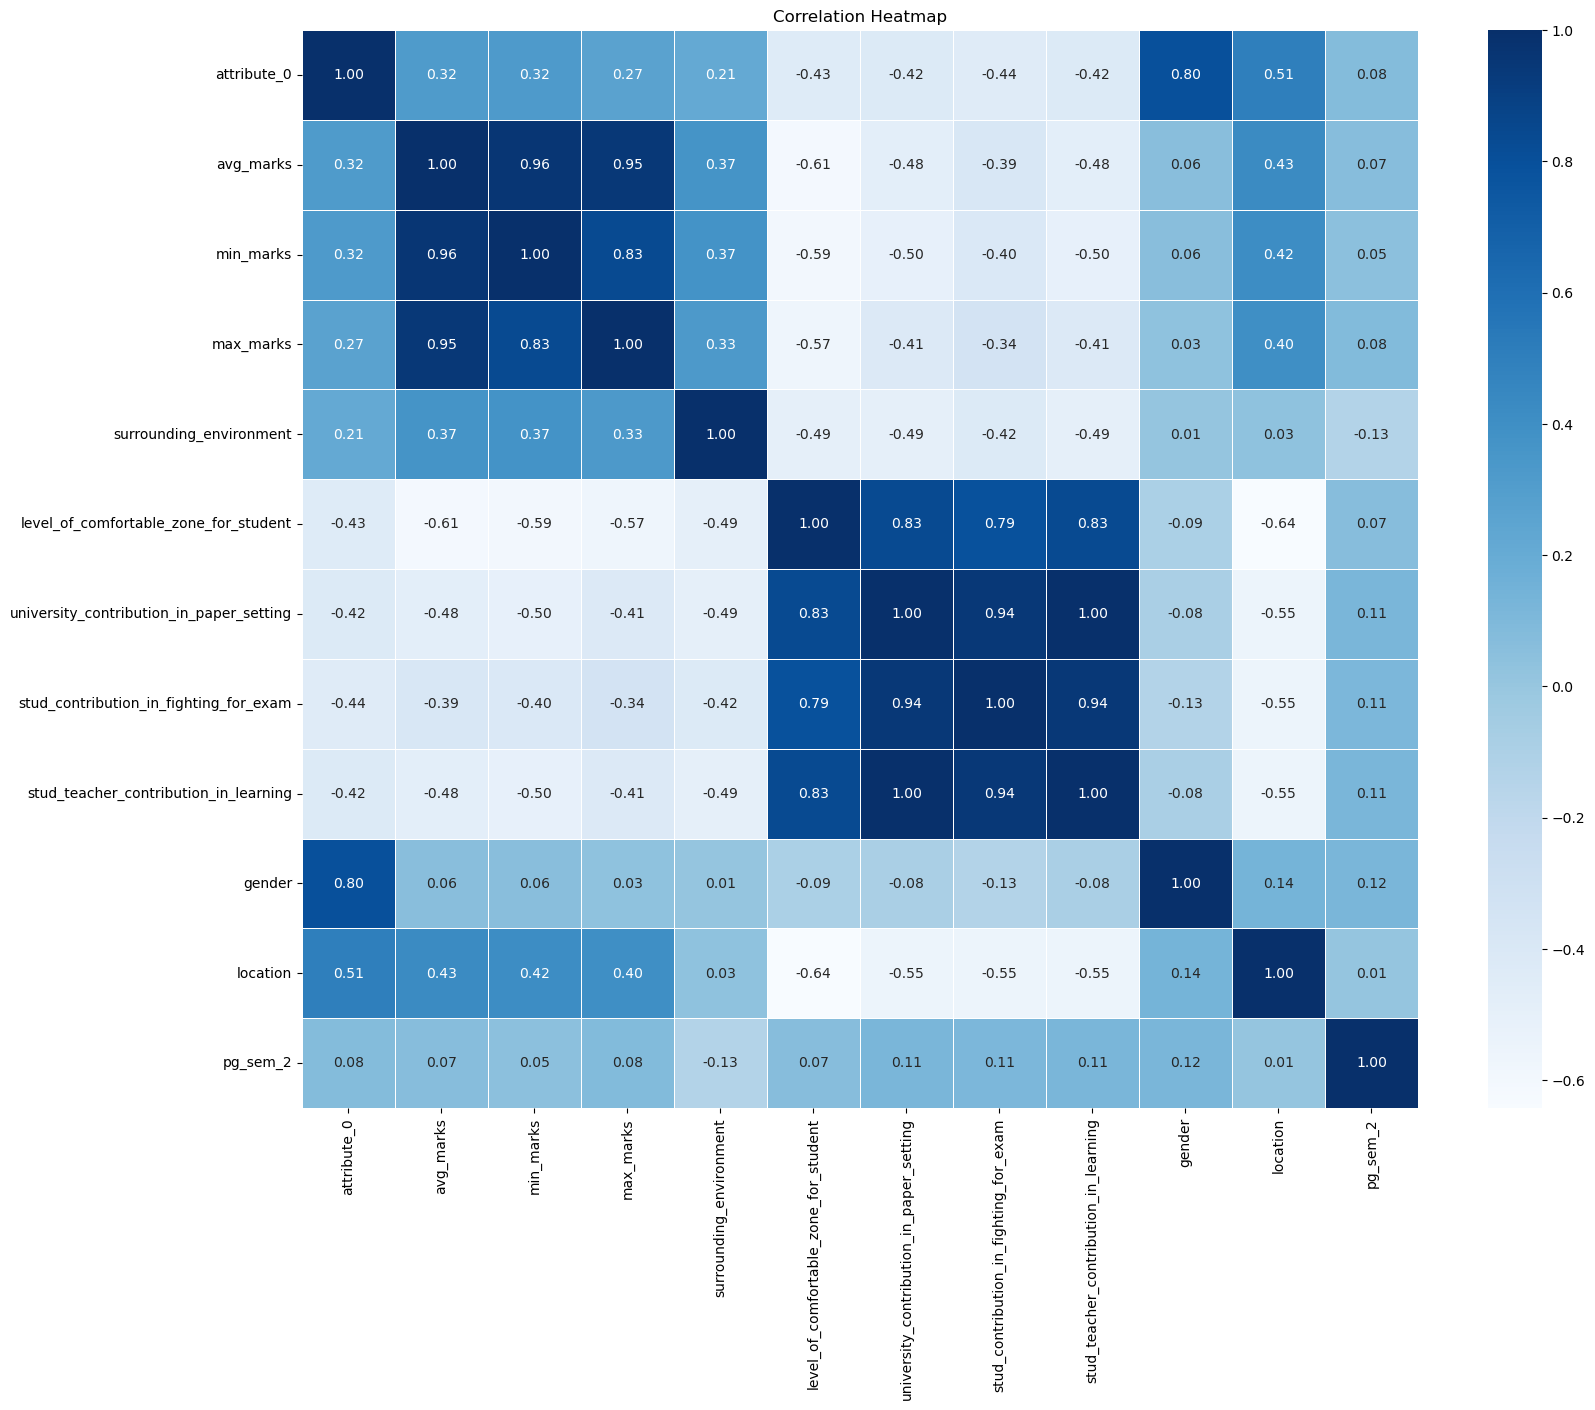

In [172]:
corr_matrix = G1.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

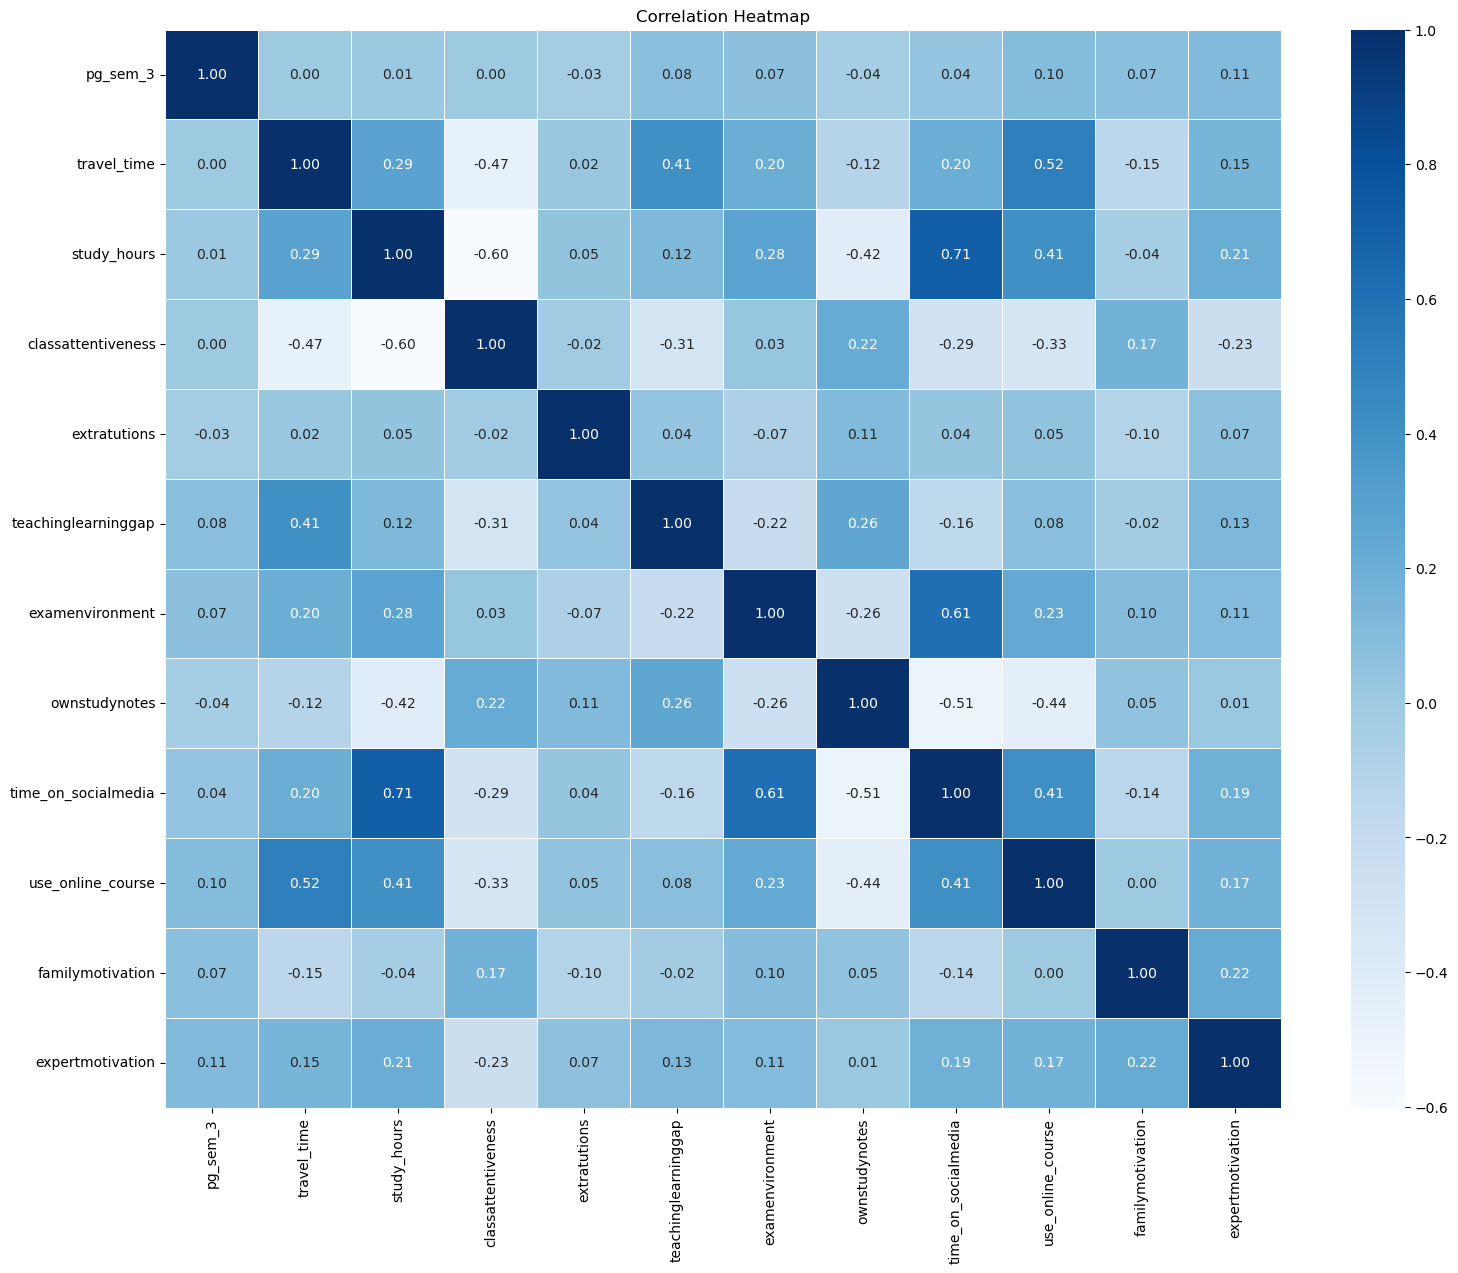

In [173]:
corr_matrix =G2.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

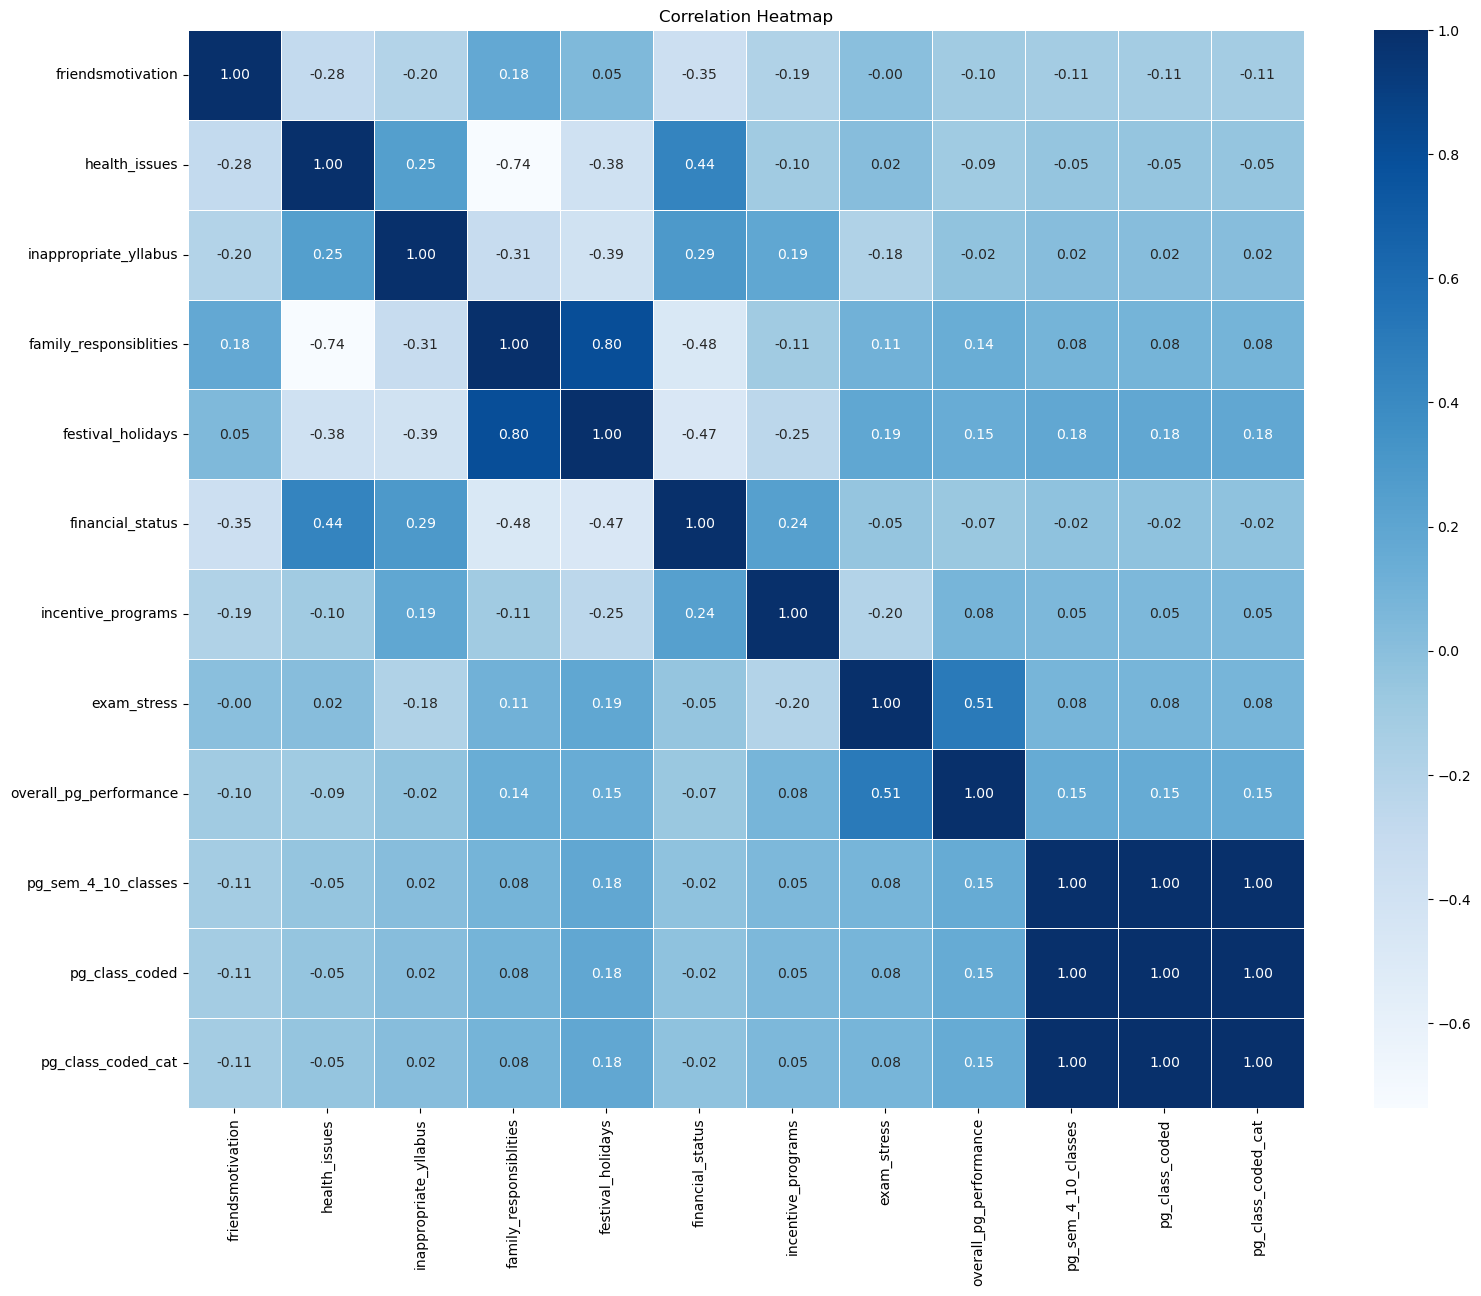

In [174]:
corr_matrix = G3.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

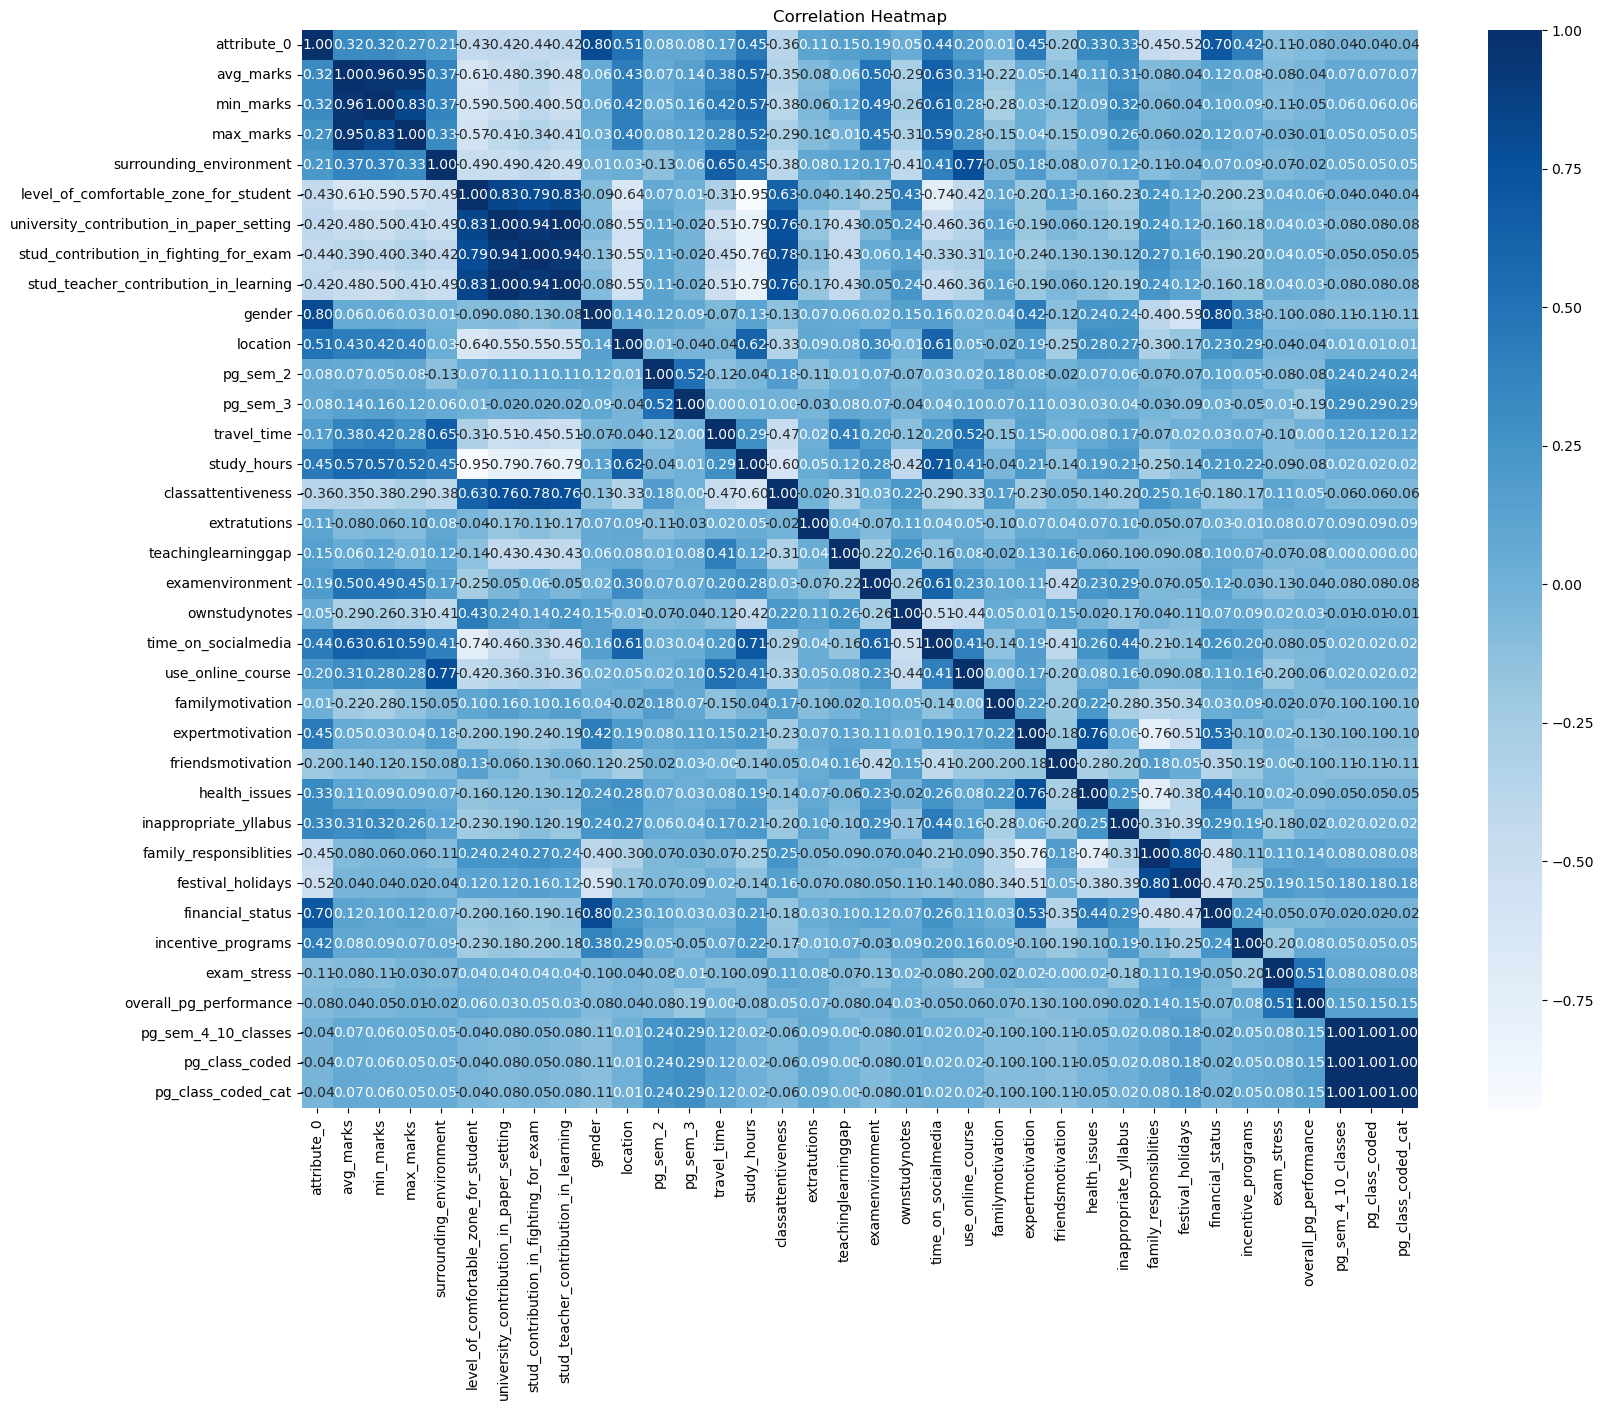

In [175]:
corr_matrix = df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [176]:
df = df.drop(["attribute_0"] , axis=1)

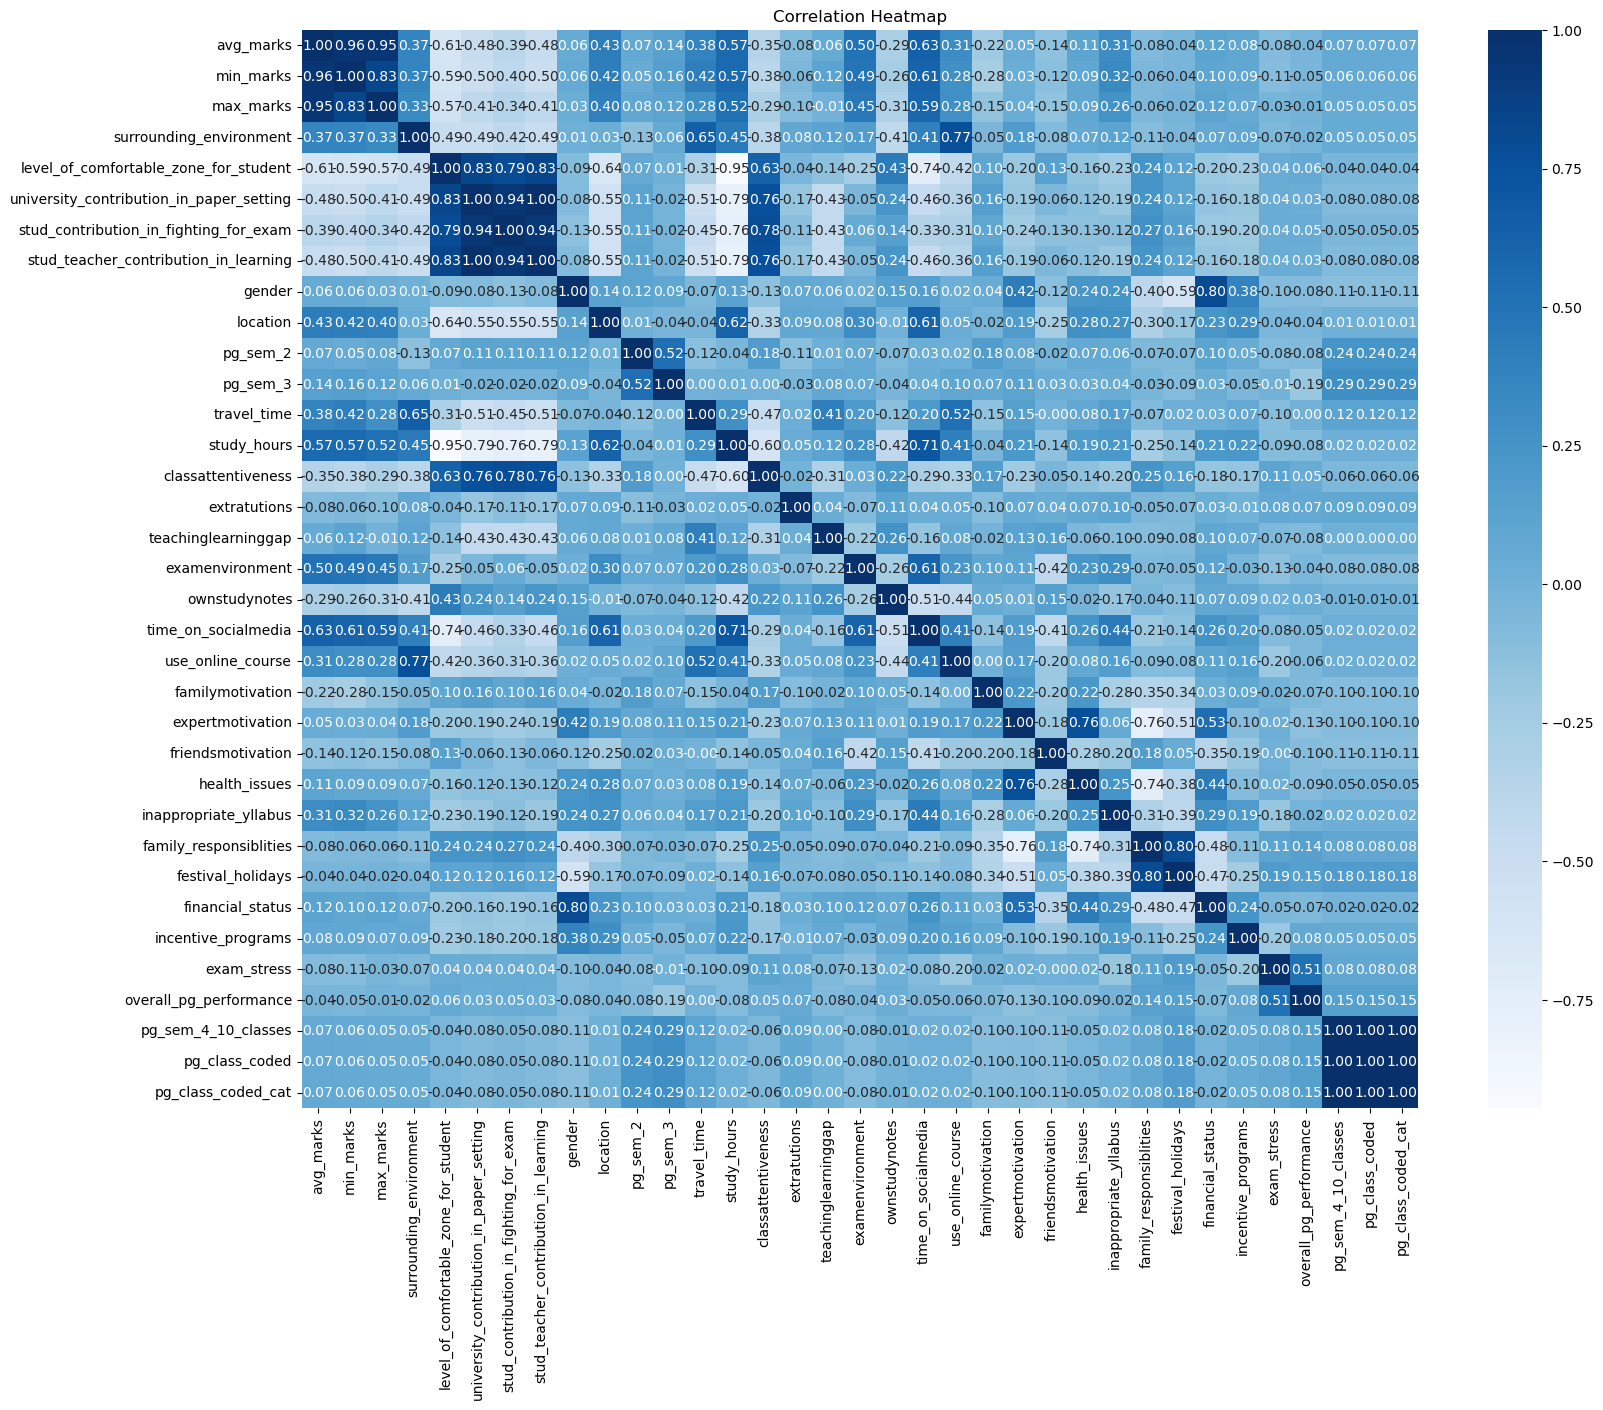

In [177]:
corr_matrix = df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [178]:
G1= df.iloc[ : , :12]
G2= df.iloc[ : , 12:24]
G3= df.iloc[ : , 24:35]


In [ ]:
corr_matrix = G1.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_matrix = G2.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_matrix = G3.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.columns

In [ ]:
df= df.drop(["travel_time", "use_online_course", "friendsmotivation" , "familymotivation"] , axis=1)

In [ ]:
G1= df.iloc[ : , :10]
G2= df.iloc[ : , 10:20]
G3= df.iloc[ : , 20:31]


In [ ]:
corr_matrix = G1.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_matrix = G2.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_matrix = G3.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show() 

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df=df.drop(["pg_sem_3" , "classattentiveness"] , axis=1)

In [ ]:
G1= df.iloc[ : , :10]
G2= df.iloc[ : , 10:20]
G3= df.iloc[ : , 20:29]


In [ ]:
corr_matrix = G1.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_matrix = G2.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_matrix = G3.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Separate feature and class

In [ ]:
X = df.drop('overall_pg_performance', axis=1)  
y = df['overall_pg_performance']

In [ ]:
print(X)

In [ ]:
print(y)

## Standardize 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:1]

## Apply PCA

In [ ]:
pca = PCA(n_components=20)  
X_pca = pca.fit_transform(X_scaled)
X_pca

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)
print("Size of Train X = " , len(X_train))
print("Size of Train y = " , len(y_train))
print("Size of Test X = " , len(X_test))
print("Size of Test y = " , len(y_test))
#print(f"X_train shape: {X_train.shape}")
#print(f"X_test shape: {X_test.shape}")
#print(f"y_train shape: {y_train.shape}")
#print(f"y_test shape: {y_test.shape}")

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X_pca,y, test_size =0.2, random_state=75)

## LINEAR REGRESSION

In [ ]:

HP= LinearRegression()
HP.fit(X_train, y_train) 
LinearRegression()

## Training

In [ ]:
training_data_prediction = HP.predict(X_train)
print(training_data_prediction)

In [ ]:
score_1 = metrics.r2_score(y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)


In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(" Actual Vs Predicted OverAll PG Performance")
plt.show()


## Testing

In [ ]:
y_pred = HP.predict(X_test)
y_pred
print(y_pred)

## Testing Accuracy with r2_score and find loss with Mean Absolute Error

In [ ]:
score_1 = metrics.r2_score(y_test, y_pred)  # R squared Score
score_2 = metrics.mean_absolute_error(y_test, y_pred) # Mean Absolute Error 

In [ ]:
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2) 

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title(" Actual Vs Predicted OverAll PG Performance")
plt.show()

## Support Vector Machine

In [ ]:
from sklearn.svm import SVR
HP = SVR(kernel='linear') 
HP.fit(X_train, y_train) 
SVR(kernel='linear')

### Prediction on Training Data

### accuracy  on training data

In [ ]:
training_data_prediction = HP.predict(X_train)
print(training_data_prediction)

### R squared score

In [ ]:
score_1 = metrics.r2_score(y_train, training_data_prediction)

## Mean Absolute Error

In [ ]:
score_2 = metrics.mean_absolute_error(y_train, 
training_data_prediction)
print("R squared score : ", score_1)
print('Mean Absolute Error : ', score_2)

### prediction graph

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# Prediction on Test Data

In [ ]:
y_pred = HP.predict(X_test)
y_pred
print(y_pred)

### R squared score

In [ ]:
score_1 = metrics.r2_score(y_test, y_pred)

## Mean Absolute Error

In [ ]:
score_2 = metrics.mean_absolute_error(y_test, y_pred)
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)


### prediction graph

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

## REGRESSION DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
HP = DecisionTreeRegressor(random_state = 75)

In [ ]:
HP.fit(X_train, y_train) 
DecisionTreeRegressor(random_state=75)


# Prediction on Training Data

In [ ]:
training_data_prediction = HP.predict(X_train)
print(training_data_prediction)

## R squared score

In [ ]:
score_1 = metrics.r2_score(y_train, training_data_prediction)

## Mean Absolute Error

In [ ]:
score_2 = metrics.mean_absolute_error(y_train, 
training_data_prediction)
print("R squared score : ", score_1)
print('Mean Absolute Error : ', score_2)

### prediction graph

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# Prediction on Test Data

In [ ]:
y_pred = HP.predict(X_test)
y_pred

## R squared score

In [ ]:
score_1 = metrics.r2_score(y_test, y_pred)

## Mean Absolute Error

In [ ]:
score_2 = metrics.mean_absolute_error(y_test, y_pred)
print("R squared score : ", score_1)
print('Mean Absolute Error : ', score_2)

### prediction graph

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
HP = RandomForestRegressor(n_estimators=5, random_state=75)
 
HP.fit(X_train, y_train) 
RandomForestRegressor(n_estimators=5, random_state=75)

## Prediction on Training Data

In [ ]:
training_data_prediction = HP.predict(X_train)
print(training_data_prediction)

## R squared error

In [ ]:
score_1 = metrics.r2_score(y_train, training_data_prediction)

## Mean Absolute Error

In [ ]:
score_2 = metrics.mean_absolute_error(y_train, 
training_data_prediction)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

### prediction graph

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# Prediction on Test Data

In [ ]:
y_pred = HP.predict(X_test)
y_pred


## R squared Score

In [ ]:
score_1 = metrics.r2_score(y_test, y_pred)

### Mean Absolute Error

In [ ]:
score_2 = metrics.mean_absolute_error(y_test, y_pred)
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)

### prediction graph

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

## Final tree

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
tree_to_plot = HP.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), 
filled=True, rounded=True, fontsize=5)
plt.title("Decision Tree from Random Forest")
plt.show()


# **Model Performance Analysis Report**

## **1. Accuracy on Train Data and Test Data**

### **Linear Regression**
- **Train \( R^2 \):** 0.34 (Moderate fit)  
- **Test \( R^2 \):** 0.33 (Moderate fit)
- **Observation:** Large gap between training and testing \( R^2 \), indicating possible underfitting during training.

### **Support Vector Machine (SVM)**
- **Train \( R^2 \):** 0.201 (Poor fit)  
- **Test \( R^2 \):** 0.218 (Poor fit)  
- **Observation:** Low \( R^2 \) for both train and test, indicating underfitting.

### **Regression Decision Tree**
- **Train \( R^2 \):** 1.0 (Perfect fit)  
- **Test \( R^2 \):** 0.970 (Excellent fit)  
- **Observation:** High \( R^2 \) for both train and test, but the perfect score on training suggests overfitting.

### **Random Forest**
- **Train \( R^2 \):** 0.989 (Very high fit)  
- **Test \( R^2 \):** 0.962 (Excellent fit)  
- **Observation:** Slightly lower \( R^2 \) on the test set compared to training, indicating a well-balanced model.

---

## **2. Overfitting**
**Overfitting is indicated when the model performs exceptionally well on training data but significantly worse on testing data.**
- **Regression Decision Tree:** Likely overfitting due to a perfect \( R^2 \) score (1.0) on training but slightly lower on testing.
- **Random Forest:** Minimal overfitting as train and test \( R^2 \) values are close.

---

## **3. Underfitting**
**Underfitting occurs when the model performs poorly on both training and testing data.**
- **Support Vector Machine (SVM):** Underfits because its \( R^2 \) values are low for both train (0.201) and test (0.218) datasets.
- **Linear Regression:** Slightly underfits during training but performs well on the test set.

---

## **4. Best Performing Model**

### **Regression Decision Tree**
- Performs very well on the test data (\( R^2 > 0.97\)), but may overfit the training data, causing potential instability with new data.

### **Random Forest**
- Achieves a good balance between train and test performance.
- Avoids extreme overfitting while maintaining high accuracy.
- **Overall Best Model**: Random Forest is the most consistent and accurate model.

---

## **Summary**
1. **Accuracy on Train and Test Data:** Random Forest is the most consistent and accurate.
2. **Overfitting:** Regression Decision Tree overfits the most.
3. **Underfitting:** Support Vector Machine (SVM) underfits.
4. **Overall Best Model:** Random Forest balances train and test performance effectively, making it the top-performing model.




---

# **Goodbye and Best Regards**  
## **Team: Student Performance Prediction and Grade Classification**  

We extend our heartfelt gratitude to our instructor, **Mr. Shoaib Farooq**, for guiding us throughout this project. This experience has allowed us to enhance our understanding of machine learning concepts and practical applications.  

---

### **✨ Thank you for this opportunity to grow and learn! 😊**  
